### Step 1: Retrieving the dataset

In [1]:
# The API link
link = "https://data.cms.gov/resource/ehrv-m9r6.json"

# The app token
key = "oBbcgRhXZS4dqtTJVyz6zQujv"

# Code snippet for data retrieval using python, as provided by the API information page
import pylab
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
warnings.filterwarnings('ignore')

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cms.gov", key)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cms.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ehrv-m9r6", limit=163065)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

# Checking the head of the data frame
#results_df.head()

### Step 2: Determine Each State's Top Procedure

In [2]:
# Method 01 exclude tie's

# Group results by "provider_state" and "drg_definition"
resultGB = results_df.groupby(["provider_state","drg_definition"])

# Count number of provider_id and rename provider_id column
resultGB = pd.DataFrame(resultGB["provider_id"].count())
resultGB.rename(columns = {"provider_id": "Provider Count"}, inplace = True)

# Reset index and sort values by "Provider Count" descending
resultGB = resultGB.reset_index()
resultGB = resultGB.sort_values(by="Provider Count", ascending=False)

# Eliminating duplicates while keeping the first occurance by "provider_state"
resultGB = resultGB.drop_duplicates(subset="provider_state", keep="first").reset_index(drop=True)
resultGB = resultGB.rename(columns = {"provider_state":"State","drg_definition":"Diagnosis"})

# Determine the highest provider count for the top 5 States
resultGB.head()

,State,Diagnosis,Provider Count
0,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,273
1,TX,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,255
2,FL,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,165
3,NY,292 - HEART FAILURE & SHOCK W CC,158
4,PA,292 - HEART FAILURE & SHOCK W CC,139


### Step 3: Select the top 5 procedure count to determine the relationship between the number of procedures done for a drg code to cost.


In [3]:
# Format dataframe column float values
pd.options.display.float_format = '${:,.2f}'.format

# Selecting certain columns from results_df
proce_vs_cost = results_df[["provider_state","drg_definition","average_covered_charges","total_discharges"]]

# Converting "average_covered_charges" and "total_discharges" to float and interger
proce_vs_cost["average_covered_charges"] = proce_vs_cost["average_covered_charges"].apply(pd.to_numeric)
proce_vs_cost["total_discharges"] = proce_vs_cost["total_discharges"].apply(pd.to_numeric)

# Equation used to find "Cost Per Discharge"
proce_vs_cost["Cost Per Discharge"] = proce_vs_cost["average_covered_charges"]/proce_vs_cost["total_discharges"]
proce_vs_cost = proce_vs_cost.rename(columns={"provider_state":"State", "drg_definition":"Diagnosis","average_covered_charges":"Provider's Average Charge Covered by Medicare","total_discharges":"Total Discharges"})

##### Top No. 1 CA (871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC)

In [4]:
# Extracting CA with Diagnosis 871 from DataFrame
CA_state = proce_vs_cost[proce_vs_cost["State"] == "CA"].reset_index(drop=True)
CA_state_871 = CA_state[CA_state["Diagnosis"] == "871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC"].reset_index(drop=True)

# Sorting Total Discharges via descending
CA_state_871_desc = CA_state_871.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
CA_state_871_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,"$76,116.17",645,$118.01
1,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,"$97,071.34",597,$162.60
2,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,"$92,706.44",415,$223.39
3,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,"$142,032.24",414,$343.07
4,CA,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,"$53,171.20",385,$138.11


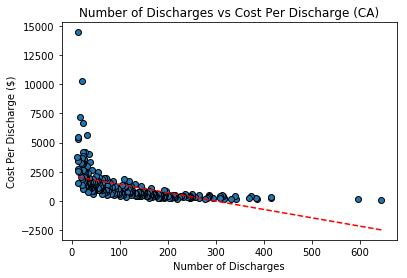

In [5]:
# Defining x and y values for plot
x = CA_state_871_desc["Total Discharges"]
y = CA_state_871_desc["Cost Per Discharge"]

# Scatter plot. Where x is the number of discharges and y is the cost per discharge
plt.scatter(x, y, edgecolors="black")
plt.title("Number of Discharges vs Cost Per Discharge (CA)")
plt.xlabel("Number of Discharges")
plt.ylabel("Cost Per Discharge ($)")

# Adding trendline for scatter plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
plt.show()

##### Top No. 2 TX (690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC)

In [6]:
# Extracting TX with Diagnosis 690 from DataFrame
TX_state = proce_vs_cost[proce_vs_cost["State"] == "TX"].reset_index(drop=True)
TX_state_690 = TX_state[TX_state["Diagnosis"] == "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC"].reset_index(drop=True)

# Sorting Total Discharges via descending
TX_state_690_desc = TX_state_690.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
TX_state_690_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,TX,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$22,001.54",411,$53.53
1,TX,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$23,415.63",352,$66.52
2,TX,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$17,661.13",291,$60.69
3,TX,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$35,083.95",266,$131.89
4,TX,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$28,242.07",252,$112.07


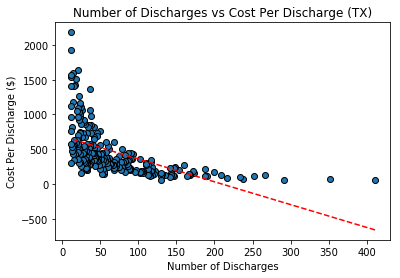

In [7]:
# Defining x and y values for plot
x = TX_state_690_desc["Total Discharges"]
y = TX_state_690_desc["Cost Per Discharge"]

# Scatter plot. Where x is the number of discharges and y is the cost per discharge
plt.scatter(x, y, edgecolors="black")
plt.title("Number of Discharges vs Cost Per Discharge (TX)")
plt.xlabel("Number of Discharges")
plt.ylabel("Cost Per Discharge ($)")

# Adding trendline for scatter plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
plt.show()

##### Top No. 3 FL (690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC)

In [8]:
# Extracting FL with Diagnosis 690 from DataFrame
FL_state = proce_vs_cost[proce_vs_cost["State"] == "FL"].reset_index(drop=True)
FL_state_690 = FL_state[FL_state["Diagnosis"] == "690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC"].reset_index(drop=True)

# Sorting Total Discharges via descending
FL_state_690_desc = FL_state_690.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
FL_state_690_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,FL,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$24,223.62",807,$30.02
1,FL,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$21,558.38",317,$68.01
2,FL,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$26,282.96",306,$85.89
3,FL,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$16,869.59",273,$61.79
4,FL,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,"$19,298.14",262,$73.66


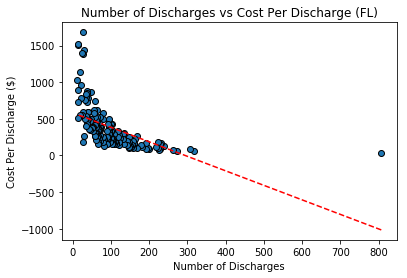

In [9]:
# Defining x and y values for plot
x = FL_state_690_desc["Total Discharges"]
y = FL_state_690_desc["Cost Per Discharge"]

# Scatter plot. Where x is the number of discharges and y is the cost per discharge
plt.scatter(x, y, edgecolors="black")
plt.title("Number of Discharges vs Cost Per Discharge (FL)")
plt.xlabel("Number of Discharges")
plt.ylabel("Cost Per Discharge ($)")

# Adding trendline for scatter plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
plt.show()

##### Top No. 4 NY (292 - HEART FAILURE & SHOCK W CC)

In [10]:
# Extracting NY with Diagnosis 292 from DataFrame
NY_state = proce_vs_cost[proce_vs_cost["State"] == "NY"].reset_index(drop=True)
NY_state_292 = NY_state[NY_state["Diagnosis"] == "292 - HEART FAILURE & SHOCK W CC"].reset_index(drop=True)

# Sorting Total Discharges via descending
NY_state_292_desc = NY_state_292.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
NY_state_292_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,NY,292 - HEART FAILURE & SHOCK W CC,"$43,839.46",475,$92.29
1,NY,292 - HEART FAILURE & SHOCK W CC,"$51,236.33",421,$121.70
2,NY,292 - HEART FAILURE & SHOCK W CC,"$55,929.32",312,$179.26
3,NY,292 - HEART FAILURE & SHOCK W CC,"$35,323.43",306,$115.44
4,NY,292 - HEART FAILURE & SHOCK W CC,"$49,305.82",256,$192.60


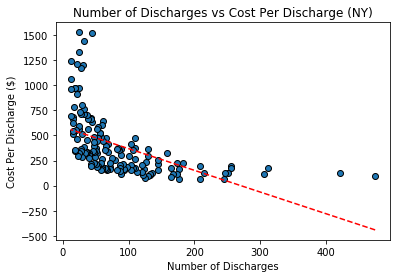

In [11]:
# Defining x and y values for plot
x = NY_state_292_desc["Total Discharges"]
y = NY_state_292_desc["Cost Per Discharge"]

# Scatter plot. Where x is the number of discharges and y is the cost per discharge
plt.scatter(x, y, edgecolors="black")
plt.title("Number of Discharges vs Cost Per Discharge (NY)")
plt.xlabel("Number of Discharges")
plt.ylabel("Cost Per Discharge ($)")

# Adding trendline for scatter plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
plt.show()

##### Top No. 5 PA (292 - HEART FAILURE & SHOCK W CC)

In [12]:
# Extracting PA with Diagnosis 292 from DataFrame
PA_state = proce_vs_cost[proce_vs_cost["State"] == "PA"].reset_index(drop=True)
PA_state_292 = PA_state[PA_state["Diagnosis"] == "292 - HEART FAILURE & SHOCK W CC"].reset_index(drop=True)

# Sorting Total Discharges via descending
PA_state_292_desc = PA_state_292.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
PA_state_292_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,PA,292 - HEART FAILURE & SHOCK W CC,"$29,413.45",329,$89.40
1,PA,292 - HEART FAILURE & SHOCK W CC,"$22,254.23",306,$72.73
2,PA,292 - HEART FAILURE & SHOCK W CC,"$39,063.05",305,$128.08
3,PA,292 - HEART FAILURE & SHOCK W CC,"$22,521.77",284,$79.30
4,PA,292 - HEART FAILURE & SHOCK W CC,"$12,289.63",281,$43.74


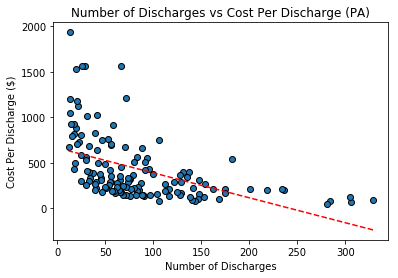

In [13]:
# Defining x and y values for plot
x = PA_state_292_desc["Total Discharges"]
y = PA_state_292_desc["Cost Per Discharge"]

# Scatter plot. Where x is the number of discharges and y is the cost per discharge
plt.scatter(x, y, edgecolors="black")
plt.title("Number of Discharges vs Cost Per Discharge (PA)")
plt.xlabel("Number of Discharges")
plt.ylabel("Cost Per Discharge ($)")

# Adding trendline for scatter plot
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pylab.plot(x,p(x),"r--")
plt.show()

### Step 4: Select the bottom 5 procedure count to determine the relationship between the number of procedures done for a drg code to cost.


In [14]:
# Determine the highest provider count for the bottom 5 States
resultGB.tail()

,State,Diagnosis,Provider Count
46,AK,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",8
47,DC,812 - RED BLOOD CELL DISORDERS W/O MCC,7
48,ND,194 - SIMPLE PNEUMONIA & PLEURISY W CC,7
49,VT,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,6
50,DE,292 - HEART FAILURE & SHOCK W CC,6


##### Bottom No. 1 DE (292 - HEART FAILURE & SHOCK W CC)

In [15]:
# Extracting DE with Diagnosis 292 from DataFrame
DE_state = proce_vs_cost[proce_vs_cost["State"] == "DE"].reset_index(drop=True)
DE_state_292 = DE_state[DE_state["Diagnosis"] == "292 - HEART FAILURE & SHOCK W CC"].reset_index(drop=True)

# Sorting Total Discharges via descending
DE_state_292_desc = DE_state_292.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
DE_state_292_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,DE,292 - HEART FAILURE & SHOCK W CC,"$16,482.74",455,$36.23
1,DE,292 - HEART FAILURE & SHOCK W CC,"$15,608.49",115,$135.73
2,DE,292 - HEART FAILURE & SHOCK W CC,"$13,998.17",89,$157.28
3,DE,292 - HEART FAILURE & SHOCK W CC,"$21,723.54",86,$252.60
4,DE,292 - HEART FAILURE & SHOCK W CC,"$21,474.80",60,$357.91


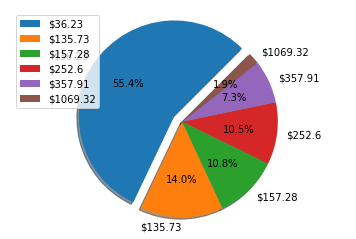

In [16]:
# Setting up variable values for pie plot
sizes = DE_state_292_desc["Total Discharges"]
explode = (0.1,0,0,0,0,0)
labels=["$36.23", "$135.73", "$157.28", "$252.6", "$357.91", "$1069.32"]

# Pie plot where % represents the precentage of Total Discharges for each provider
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=45)
ax1.axis('equal')
plt.legend(loc="upper left")
plt.show()

##### Bottom No. 2 VT (191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC)

In [17]:
# Extracting VT with Diagnosis 191 from DataFrame
VT_state = proce_vs_cost[proce_vs_cost["State"] == "VT"].reset_index(drop=True)
VT_state_191 = VT_state[VT_state["Diagnosis"] == "191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC"].reset_index(drop=True)

# Sorting Total Discharges via descending
VT_state_191_desc = VT_state_191.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
VT_state_191_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,VT,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,"$16,959.34",85,$199.52
1,VT,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,"$11,773.80",68,$173.14
2,VT,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,"$13,088.02",50,$261.76
3,VT,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,"$12,579.81",43,$292.55
4,VT,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,"$12,257.89",19,$645.15


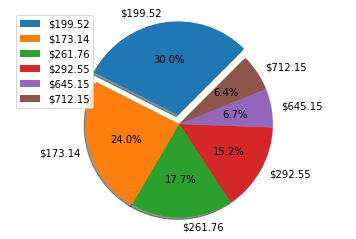

In [18]:
# Setting up variable values for pie plot
sizes = VT_state_191_desc["Total Discharges"]
explode = (0.1,0,0,0,0,0)
labels=["$199.52","$173.14","$261.76","$292.55","$645.15","$712.15"]

# Pie plot where % represents the precentage of Total Discharges for each provider
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=45)
ax1.axis('equal') 
plt.legend(loc="upper left")
plt.show()

##### Bottom No. 3 DC (812 - RED BLOOD CELL DISORDERS W/O MCC)


In [19]:
# Extracting DC with Diagnosis 812 from DataFrame
DC_state = proce_vs_cost[proce_vs_cost["State"] == "DC"].reset_index(drop=True)
DC_state_812 = DC_state[DC_state["Diagnosis"] == "812 - RED BLOOD CELL DISORDERS W/O MCC"].reset_index(drop=True)

# Sorting Total Discharges via descending
DC_state_812_desc = DC_state_812.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
DC_state_812_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,DC,812 - RED BLOOD CELL DISORDERS W/O MCC,"$21,741.77",147,$147.90
1,DC,812 - RED BLOOD CELL DISORDERS W/O MCC,"$22,996.31",85,$270.54
2,DC,812 - RED BLOOD CELL DISORDERS W/O MCC,"$12,217.08",58,$210.64
3,DC,812 - RED BLOOD CELL DISORDERS W/O MCC,"$15,105.16",53,$285.00
4,DC,812 - RED BLOOD CELL DISORDERS W/O MCC,"$21,984.32",52,$422.78


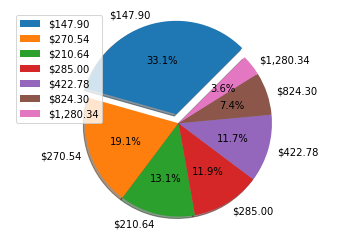

In [20]:
# Setting up variable values for pie plot
sizes = DC_state_812_desc["Total Discharges"]
explode = (0.1,0,0,0,0,0,0)
labels=["$147.90", "$270.54", "$210.64", "$285.00", "$422.78", "$824.30", "$1,280.34"]

# Pie plot where % represents the precentage of Total Discharges for each provider
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=45)
ax1.axis('equal')
plt.legend(loc="upper left")
plt.show()

##### Bottom No. 4 ND (194 - SIMPLE PNEUMONIA & PLEURISY W CC)

In [21]:
# Extracting ND with Diagnosis 194 from DataFrame
ND_state = proce_vs_cost[proce_vs_cost["State"] == "ND"].reset_index(drop=True)
ND_state_194 = ND_state[ND_state["Diagnosis"] == "194 - SIMPLE PNEUMONIA & PLEURISY W CC"].reset_index(drop=True)

# Sorting Total Discharges via descending
ND_state_194_desc = ND_state_194.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
ND_state_194_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,ND,194 - SIMPLE PNEUMONIA & PLEURISY W CC,"$12,100.62",87,$139.09
1,ND,194 - SIMPLE PNEUMONIA & PLEURISY W CC,"$12,251.13",81,$151.25
2,ND,194 - SIMPLE PNEUMONIA & PLEURISY W CC,"$12,378.29",71,$174.34
3,ND,194 - SIMPLE PNEUMONIA & PLEURISY W CC,"$10,496.84",52,$201.86
4,ND,194 - SIMPLE PNEUMONIA & PLEURISY W CC,"$11,025.74",51,$216.19


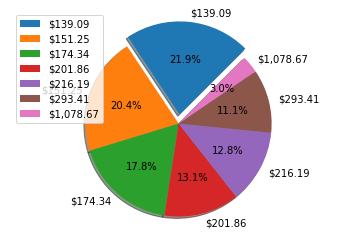

In [22]:
# Setting up variable values for pie plot
sizes = ND_state_194_desc["Total Discharges"]
explode = (0.1,0,0,0,0,0,0)
labels=["$139.09","$151.25","$174.34","$201.86","$216.19","$293.41","$1,078.67"]

# Pie plot where % represents the precentage of Total Discharges for each provider
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=45)
ax1.axis('equal')
plt.legend(loc="upper left")
plt.show()

##### Bottom No. 5 AK (392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC)

In [23]:
# Extracting AK with Diagnosis 392 from DataFrame
AK_state = proce_vs_cost[proce_vs_cost["State"] == "AK"].reset_index(drop=True)
AK_state_392 = AK_state[AK_state["Diagnosis"] == "392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC"].reset_index(drop=True)

# Sorting Total Discharges via descending
AK_state_392_desc = AK_state_392.sort_values(by=["Total Discharges"], ascending=False).reset_index(drop=True)
AK_state_392_desc.head()

,State,Diagnosis,Provider's Average Charge Covered by Medicare,Total Discharges,Cost Per Discharge
0,AK,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...","$25,227.77",53,$476.00
1,AK,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...","$11,703.02",45,$260.07
2,AK,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...","$23,845.94",35,$681.31
3,AK,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...","$17,382.36",19,$914.86
4,AK,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...","$10,425.55",18,$579.20


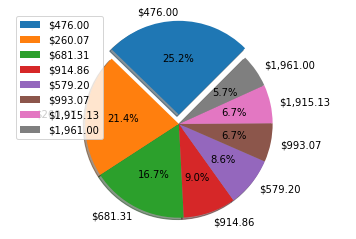

In [24]:
# Setting up variable values for pie plot
sizes = AK_state_392_desc["Total Discharges"]
explode = (0.1,0,0,0,0,0,0,0)
labels=["$476.00","$260.07","$681.31","$914.86","$579.20","$993.07","$1,915.13","$1,961.00"]

# Pie plot where % represents the precentage of Total Discharges for each provider
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=45)
ax1.axis('equal')
plt.legend(loc="upper left")
plt.show()